In [13]:
import nltk
nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\wnamr\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\wnamr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\wnamr\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\wnamr\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\wnamr\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\omw-1.4.zip.


In [1]:
pip install tweet-preprocessor

In [2]:
pip install pattern

  Using cached Pattern-3.6-py3-none-any.whl
  Using cached backports.csv-1.0.7-py2.py3-none-any.whl (12 kB)
  Using cached pdfminer.six-20220524-py3-none-any.whl (5.6 MB)
  Using cached mysqlclient-2.1.0-cp39-cp39-win_amd64.whl (180 kB)
  Using cached CherryPy-18.6.1-py2.py3-none-any.whl (419 kB)
  Using cached feedparser-6.0.10-py3-none-any.whl (81 kB)
  Using cached python_docx-0.8.11-py3-none-any.whl
  Using cached cheroot-8.6.0-py2.py3-none-any.whl (104 kB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.


### import numpy as np
import pandas as pd

df = pd.read_csv(r"C:\Users\wnamr\iCloudDrive\Documents\UM\DSRP\Code\twitterclean_sent.csv")
df.head()

In [25]:
import numpy as np
import pandas as pd

df = pd.read_csv(r"C:\Users\wnamr\iCloudDrive\Documents\UM\DSRP\Code\twitterclean_sent.csv") 
df.head()

,no,veracity,content,source,sentiment,reply numbers,retweet numbers,likes numbers,scores,compound
0,1,0,If you can hold your breath without coughing d...,8.50E+17,1,2,61,95,"{'neg': 0.072, 'neu': 0.757, 'pos': 0.171, 'co...",0.4556
1,2,0,A homemade hand sanitizer made with Titos Vodk...,8.08E+18,1,3,41,67,"{'neg': 0.138, 'neu': 0.691, 'pos': 0.17, 'com...",0.1531
2,3,0,Gargling with salt water or Vinegar eliminate ...,1.80E+18,-1,6,39,73,"{'neg': 0.158, 'neu': 0.842, 'pos': 0.0, 'comp...",-0.4939
3,4,0,Patients should avoid taking ibuprofen to reli...,1.99E+18,-1,0,0,0,"{'neg': 0.289, 'neu': 0.579, 'pos': 0.132, 'co...",-0.4588
4,5,0,Chinese officials are seeking approval to star...,6.97E+18,-1,0,0,0,"{'neg': 0.238, 'neu': 0.65, 'pos': 0.112, 'com...",-0.5423


In [19]:
import preprocessor as p

def preprocess_tweet(row):
    content = row['content']
    content = p.clean(content)
    return content

In [20]:
df['content'] = df.apply(preprocess_tweet, axis=1)

In [10]:
#lowercase the data
df['content'] = df['content'].str.lower()
df.head()

,no,veracity,content,source,sentiment,reply numbers,retweet numbers,likes numbers,scores,compound
0,1,0,if you can hold your breath without coughing d...,8.50E+17,1,2,61,95,"{'neg': 0.072, 'neu': 0.757, 'pos': 0.171, 'co...",0.4556
1,2,0,a homemade hand sanitizer made with titos vodk...,8.08E+18,1,3,41,67,"{'neg': 0.138, 'neu': 0.691, 'pos': 0.17, 'com...",0.1531
2,3,0,gargling with salt water or vinegar eliminate ...,1.80E+18,-1,6,39,73,"{'neg': 0.158, 'neu': 0.842, 'pos': 0.0, 'comp...",-0.4939
3,4,0,patients should avoid taking ibuprofen to reli...,1.99E+18,-1,0,0,0,"{'neg': 0.289, 'neu': 0.579, 'pos': 0.132, 'co...",-0.4588
4,5,0,chinese officials are seeking approval to star...,6.97E+18,-1,0,0,0,"{'neg': 0.238, 'neu': 0.65, 'pos': 0.112, 'com...",-0.5423


In [11]:
df['content'] = df['content'].apply(lambda content: nltk.word_tokenize(content))
df.head()

,no,veracity,content,source,sentiment,reply numbers,retweet numbers,likes numbers,scores,compound
0,1,0,"[if, you, can, hold, your, breath, without, co...",8.50E+17,1,2,61,95,"{'neg': 0.072, 'neu': 0.757, 'pos': 0.171, 'co...",0.4556
1,2,0,"[a, homemade, hand, sanitizer, made, with, tit...",8.08E+18,1,3,41,67,"{'neg': 0.138, 'neu': 0.691, 'pos': 0.17, 'com...",0.1531
2,3,0,"[gargling, with, salt, water, or, vinegar, eli...",1.80E+18,-1,6,39,73,"{'neg': 0.158, 'neu': 0.842, 'pos': 0.0, 'comp...",-0.4939
3,4,0,"[patients, should, avoid, taking, ibuprofen, t...",1.99E+18,-1,0,0,0,"{'neg': 0.289, 'neu': 0.579, 'pos': 0.132, 'co...",-0.4588
4,5,0,"[chinese, officials, are, seeking, approval, t...",6.97E+18,-1,0,0,0,"{'neg': 0.238, 'neu': 0.65, 'pos': 0.112, 'com...",-0.5423


In [14]:
lemmatizer = WordNetLemmatizer()

df['content'] = df['content'].apply(lambda content: lemmatizer.lemmatize(content))

TypeError: unhashable type: 'list'

In [11]:
df.head()

,no,veracity,content,source,sentiment,reply numbers,retweet numbers,likes numbers,scores,compound
0,1,0,"[if, you, can, hold, your, breath, without, co...",8.50E+17,1,2,61,95,"{'neg': 0.072, 'neu': 0.757, 'pos': 0.171, 'co...",0.4556
1,2,0,"[a, homemade, hand, sanitizer, made, with, tit...",8.08E+18,1,3,41,67,"{'neg': 0.138, 'neu': 0.691, 'pos': 0.17, 'com...",0.1531
2,3,0,"[gargling, with, salt, water, or, vinegar, eli...",1.80E+18,-1,6,39,73,"{'neg': 0.158, 'neu': 0.842, 'pos': 0.0, 'comp...",-0.4939
3,4,0,"[patients, should, avoid, taking, ibuprofen, t...",1.99E+18,-1,0,0,0,"{'neg': 0.289, 'neu': 0.579, 'pos': 0.132, 'co...",-0.4588
4,5,0,"[chinese, officials, are, seeking, approval, t...",6.97E+18,-1,0,0,0,"{'neg': 0.238, 'neu': 0.65, 'pos': 0.112, 'com...",-0.5423


In [43]:
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import where

for veracity, _ in df.items():
    row_ix = where(y == veracity)[0]
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1], veracity=str(veracity))
pyplot.legend()
pyplot.show()

NameError: name 'y' is not defined

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [10]:
text = " ".join(cont.split()[1] for cont in df.content)

AttributeError: 'DataFrame' object has no attribute 'content'

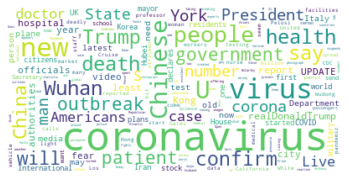

In [6]:
# Creating word_cloud for raw data with text as argument in .generate() method

word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)

# Display the generated Word Cloud

plt.imshow(word_cloud, interpolation='bilinear')

plt.axis("off")

plt.show()

In [21]:
df['content'].value_counts()

CORONAVIRUS UPDATE: Chinese city of Wuhan shuts down all outbound flights and trains after virus kills . No one will be allowed to leave the city after a.m. local time                                                                                              2
patients were admitted to San Lazaro Hospital and of them are Chinese nationals from Wuhan                                                                                                                                                                           2
Virus-hit Wuhan has two laboratories linked to Chinese bio-warfare program                                                                                                                                                                                           2
CDC adds health entry screenings at Atlanta airport due to coronavirus                                                                                                                                             

In [22]:
a = 'Gargling with salt water or Vinegar eliminate the COVID-19 coronavirus from the throat of an infected persons system'
sid.polarity_scores(a)

{'neg': 0.158, 'neu': 0.842, 'pos': 0.0, 'compound': -0.4939}

In [24]:
df.columns

Index(['no', 'veracity', 'content', 'source', 'sentiment', 'reply numbers',
       'retweet numbers', 'likes numbers', 'scores', 'compound'],
      dtype='object')

In [17]:
df['scores'] = df['content'].apply(lambda content: sid.polarity_scores(content))

df.head()

AttributeError: 'list' object has no attribute 'encode'

In [33]:
df['compound']  = df['scores'].apply(lambda score_dict: score_dict['compound'])

df.head()

,no,veracity,content,source,sentiment,reply numbers,retweet numbers,likes numbers,scores,compound
0,1,0,If you can hold your breath without coughing d...,8.50E+17,1,2,61,95,"{'neg': 0.072, 'neu': 0.757, 'pos': 0.171, 'co...",0.4556
1,2,0,A homemade hand sanitizer made with Titos Vodk...,8.08E+18,1,3,41,67,"{'neg': 0.138, 'neu': 0.691, 'pos': 0.17, 'com...",0.1531
2,3,0,Gargling with salt water or Vinegar eliminate ...,1.80E+18,-1,6,39,73,"{'neg': 0.158, 'neu': 0.842, 'pos': 0.0, 'comp...",-0.4939
3,4,0,Patients should avoid taking ibuprofen to reli...,1.99E+18,-1,0,0,0,"{'neg': 0.289, 'neu': 0.579, 'pos': 0.132, 'co...",-0.4588
4,5,0,Chinese officials are seeking approval to star...,6.97E+18,-1,0,0,0,"{'neg': 0.238, 'neu': 0.65, 'pos': 0.112, 'com...",-0.5423


In [34]:
df['sentiment'] = df['compound'].apply(lambda c: 1 if c >= 0 else -1 )
df.head()

,no,veracity,content,source,sentiment,reply numbers,retweet numbers,likes numbers,scores,compound
0,1,0,If you can hold your breath without coughing d...,8.50E+17,1,2,61,95,"{'neg': 0.072, 'neu': 0.757, 'pos': 0.171, 'co...",0.4556
1,2,0,A homemade hand sanitizer made with Titos Vodk...,8.08E+18,1,3,41,67,"{'neg': 0.138, 'neu': 0.691, 'pos': 0.17, 'com...",0.1531
2,3,0,Gargling with salt water or Vinegar eliminate ...,1.80E+18,-1,6,39,73,"{'neg': 0.158, 'neu': 0.842, 'pos': 0.0, 'comp...",-0.4939
3,4,0,Patients should avoid taking ibuprofen to reli...,1.99E+18,-1,0,0,0,"{'neg': 0.289, 'neu': 0.579, 'pos': 0.132, 'co...",-0.4588
4,5,0,Chinese officials are seeking approval to star...,6.97E+18,-1,0,0,0,"{'neg': 0.238, 'neu': 0.65, 'pos': 0.112, 'com...",-0.5423


In [35]:
df['veracity'] = df['veracity'].replace('T', 1)
df['veracity'] = df['veracity'].replace('F',0)


df.to_csv(r"C:\Users\wnamr\iCloudDrive\Documents\UM\DSRP\Code\twitterclean_sent.csv", index = False)